In [1]:
import sklearn 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
automobile_df = pd.read_csv('../datasets/automobiles/auto-mpg-processed.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,30.0,4,79.0,70,2074,19.5,49
1,30.0,4,97.0,67,1985,16.4,43
2,15.0,6,258.0,110,3730,19.0,45
3,21.1,4,134.0,95,2515,14.8,42
4,34.7,4,105.0,63,2215,14.9,39


## Regression Using 'horsepower'

In [3]:
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]
y = automobile_df[['mpg']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
x_train.sample(5)

,horsepower
259,165
158,105
302,140
129,95
285,140


### Normalization

* Normalization **scales all numeric features to be between 0 and 1**. Having features in the same scale can vastly improve the performance of ML model
* Set normalize=**True** 
* For simple Regression it's not going to make much difference 

In [5]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

* R-square is a measure of how well our linear model **Captures the underlying variation** in our training data

* **score** function returns the R-square value on the training data

In [6]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6083760795632147


In [7]:
y_pred = linear_model.predict(x_test)

**r2_score** function returns the R-square value on the test data

In [8]:
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.5867161754526021


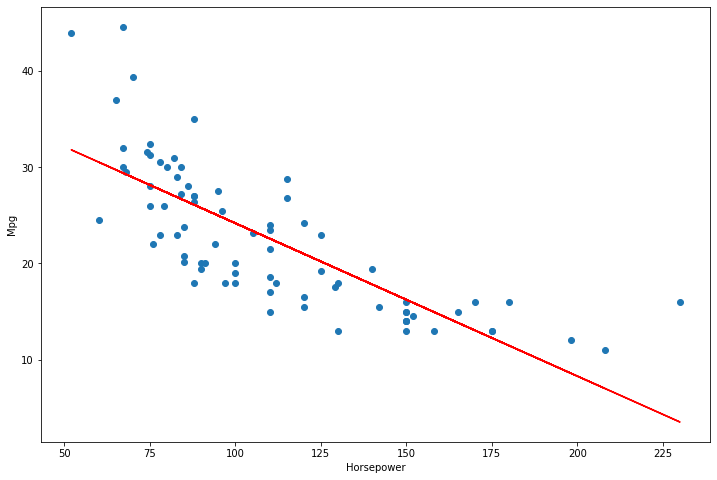

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

## Regression using 'Age'

In [10]:
X = automobile_df[['age']]
y = automobile_df[['mpg']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training Score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training Score:  0.33745151622209024
Testing score:  0.3324638052254748


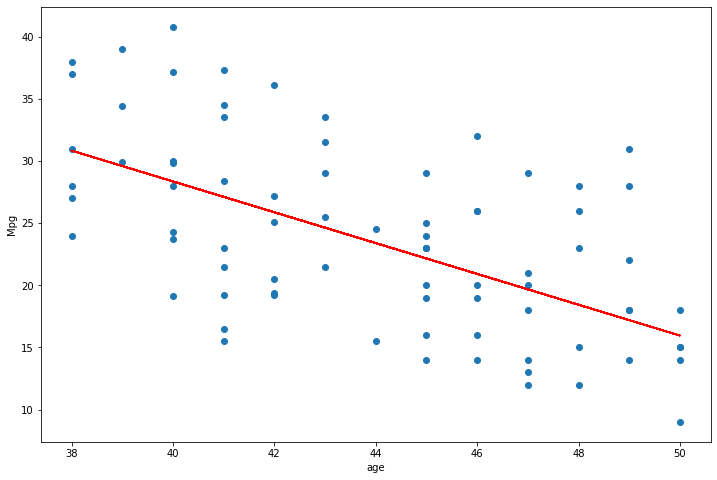

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('age')
plt.ylabel('Mpg')
plt.show()

## Regression Using multiple features

In [21]:
X = automobile_df[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']]

Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [23]:
print("Training Score: ", linear_model.score(x_train, y_train))

Training Score:  0.7057908602333868


In [24]:
predictors = x_train.columns

coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)


cylinders      -0.448212
acceleration   -0.105034
horsepower     -0.053788
weight         -0.005457
displacement    0.005360
dtype: float64


In [25]:
y_pred = linear_model.predict(x_test)

In [26]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.7104170860789776


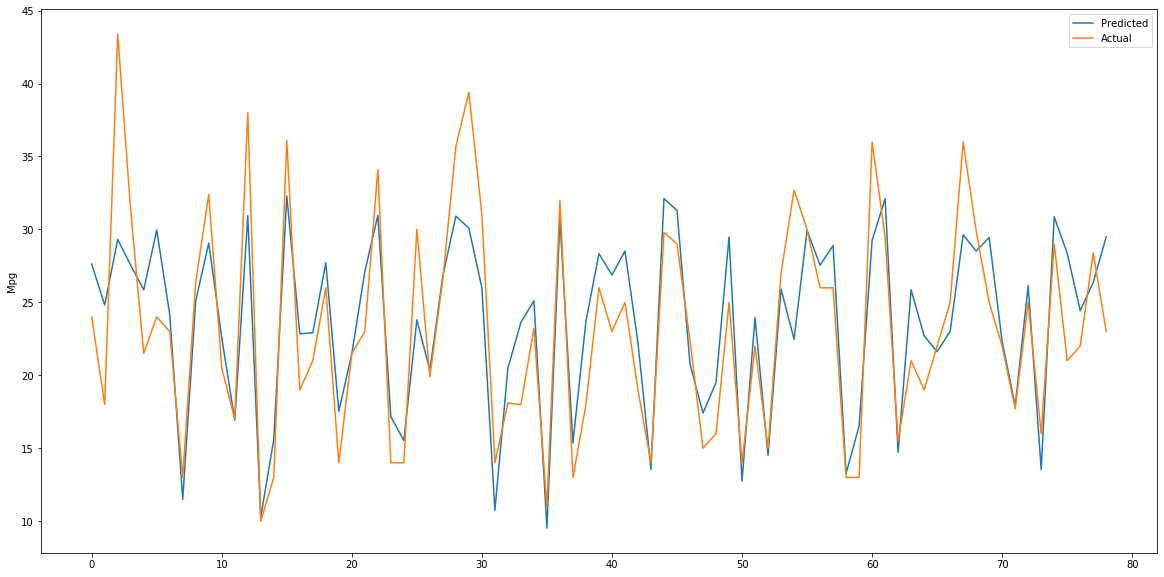

In [27]:
plt.figure(figsize=(20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label="Actual")

plt.ylabel('Mpg')

plt.legend()
plt.show()